In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

## Day 34 Lecture 2 Assignment

In this assignment, we will learn about gradient boosting. We will use a dataset of house information in Ames, Iowa, predicting sale price.

In [47]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

<IPython.core.display.Javascript object>

In [3]:
house = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/houseprices.csv"
)
print(house.shape)
house.head()

(1460, 81)


,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<IPython.core.display.Javascript object>

Check for nulls. Remove any columns with more than 100 nulls, then drop any remaining rows with nulls after that.

In [6]:
# your work here
house.isna().sum().sort_values(ascending=False)

poolqc           1453
miscfeature      1406
alley            1369
fence            1179
fireplacequ       690
                 ... 
centralair          0
salecondition       0
heating             0
totalbsmtsf         0
id                  0
Length: 81, dtype: int64

<IPython.core.display.Javascript object>

In [7]:
null_count = house.isna().sum()
keep_col = null_count[null_count < 100].index
house = house.filter(items=keep_col, axis=1)

<IPython.core.display.Javascript object>

In [11]:
pd.set_option("display.max_columns", None)

house.head()

,id,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


<IPython.core.display.Javascript object>

In [16]:
cols_of_interest = [
    "saleprice",
    "mszoning",
    "bldgtype",
    "housestyle",
    "overallcond",
    "total_baths",
    "salecondition",
    "lotarea",
    "yearremodadd",
    "yearbuilt",
    "garagearea",
]

<IPython.core.display.Javascript object>

In [15]:
house["total_baths"] = house["fullbath"] + (0.5 * house["halfbath"])

<IPython.core.display.Javascript object>

In [17]:
house = house[cols_of_interest]

<IPython.core.display.Javascript object>

In [18]:
house.head()

,saleprice,mszoning,bldgtype,housestyle,overallcond,total_baths,salecondition,lotarea,yearremodadd,yearbuilt,garagearea
0,208500,RL,1Fam,2Story,5,2.5,Normal,8450,2003,2003,548
1,181500,RL,1Fam,1Story,8,2.0,Normal,9600,1976,1976,460
2,223500,RL,1Fam,2Story,5,2.5,Normal,11250,2002,2001,608
3,140000,RL,1Fam,2Story,5,1.0,Abnorml,9550,1970,1915,642
4,250000,RL,1Fam,2Story,5,2.5,Normal,14260,2000,2000,836


<IPython.core.display.Javascript object>

One hot encode your categorical features using get_dummies.

In [22]:
# your work here
house = pd.get_dummies(
    house,
    columns=["mszoning", "bldgtype", "housestyle", "salecondition"],
    drop_first=True,
)

<IPython.core.display.Javascript object>

In [23]:
house.head()

,saleprice,overallcond,total_baths,lotarea,yearremodadd,yearbuilt,garagearea,age,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
0,208500,5,2.5,8450,2003,2003,548,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,181500,8,2.0,9600,1976,1976,460,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,223500,5,2.5,11250,2002,2001,608,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,140000,5,1.0,9550,1970,1915,642,55,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,250000,5,2.5,14260,2000,2000,836,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

Take a look at your outcome variable. It is highly skewed, and has a few very rare large outliers.

Let's try log transforming the y variable.

In [24]:
# your work here
X = house.drop(columns="saleprice")
y = house["saleprice"]

<IPython.core.display.Javascript object>

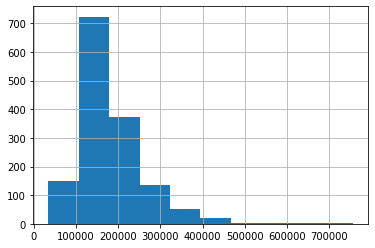

<IPython.core.display.Javascript object>

In [25]:
y.hist()
plt.show()

In [26]:
y = np.log(y)

<IPython.core.display.Javascript object>

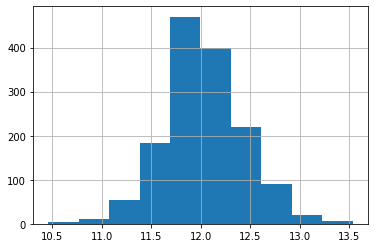

<IPython.core.display.Javascript object>

In [27]:
y.hist()
plt.show()

We know that there are some rare large values. We can make sure that the training and test sets have about the same distribution by stratifying the train-test split.

Split your training and test sets, with a test size of 0.2. Use the given helper function to stratify the continuous outcome. Remember that the outcome variable is now the **log of sale price**.

In [28]:
def binned(y, num_bins):
    # Creates an object to put in the stratify keyword in train_test_split
    # Specify number of bins to separate your y variable
    ymin, ymax = y.min(), y.max()
    bins = np.linspace(ymin, ymax, num_bins + 1)[:-1]
    y_binned = np.digitize(y, bins)
    return y_binned

<IPython.core.display.Javascript object>

In [30]:
# your work here
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=13, stratify=binned(y, 10)
)

<IPython.core.display.Javascript object>

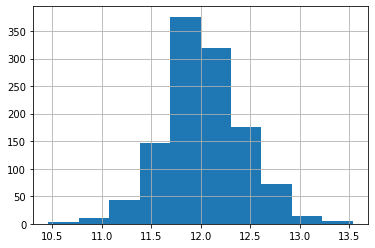

<IPython.core.display.Javascript object>

In [35]:
y_train.hist()

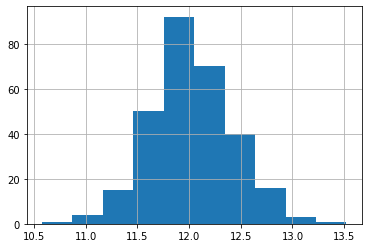

<IPython.core.display.Javascript object>

In [36]:
y_test.hist()

Create a Gradient Boosting Regressor model. Measure the MAE (Mean Absolute Error) for the training and testing sets.

In [38]:
# your work here
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

<IPython.core.display.Javascript object>

In [39]:
y_pred = model.predict(X_test)
error = y_pred - y_test

print(np.mean(np.abs(error)))

0.15277272880058934


<IPython.core.display.Javascript object>

Create a grid search. Try varying subsample, learning rate, and max features. Use MAE as your scoring metric.

In [55]:
# your work here
grid = {
    "subsample": [0.5, 0.75, 1.0],
    "max_features": [0.4, 0.6, 0.8, 1.0],
    "max_depth": [3, 4, 6],
}
model = GridSearchCV(
    GradientBoostingRegressor(),
    grid,
    scoring="neg_mean_absolute_error",
    cv=2,
    n_jobs=-1,
)

<IPython.core.display.Javascript object>

In [56]:
model.fit(X_train, y_train)
model.best_params_

{'max_depth': 4, 'max_features': 0.4, 'subsample': 0.75}

<IPython.core.display.Javascript object>

In [60]:
model.scorer_

make_scorer(mean_absolute_error, greater_is_better=False)

<IPython.core.display.Javascript object>

In [57]:
model.score(X_train, y_train)

-0.09509685281430316

<IPython.core.display.Javascript object>

In [58]:
model.score(X_test, y_test)

-0.15599495488201148

<IPython.core.display.Javascript object>

Create residual plots of the training and test sets and interpret your results.

In [61]:
# your work here
def eval_preds(y_true, y_pred):
    error = y_true - y_pred

    rmse = np.sqrt((error ** 2).mean())
    mae = error.abs().mean()
    mape = (error / y_true).abs().mean()

    print(f"rmse {rmse:.2f}")
    print(f"mae {mae:.2f}")
    print(f"mape {mape:.2f}")

    line_pts = [y_true.min(), y_true.max()]
    plt.scatter(y_true, y_pred)
    plt.plot(line_pts, line_pts, c="red", ls="--", alpha=0.5)
    plt.xlabel("Actual")
    plt.ylabel("Fit")
    plt.show()

<IPython.core.display.Javascript object>

rmse 0.22
mae 0.16
mape 0.01


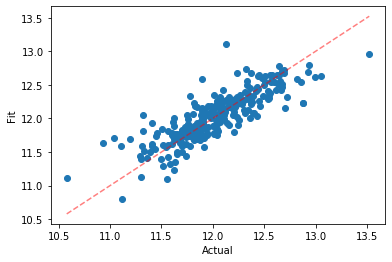

<IPython.core.display.Javascript object>

In [62]:
y_pred = model.predict(X_test)

eval_preds(y_test, y_pred)